In [1]:
import numpy as np
import lbg_forecast.population_model as pop
import lbg_forecast.priors_mass_func as pr
import matplotlib.pyplot as plt
import scipy as sc
import prospect.models.transforms as ts
import lbg_forecast.sfh as sfh

In [2]:
def plot_corr(correlations, title):
    fig = plt.figure(figsize=(10,10))

    plt.matshow(correlations, fignum=fig)

    for (i, j), z in np.ndenumerate(correlations):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20)

    plt.title(title)
    plt.colorbar()
    plt.show()

def get_sfrs_in_bins(logm, logsfrratios, zs, agebins):
    sfrs = []

    i = 0
    while(i < logm.shape[0]):
        sfrs.append(ts.logsfr_ratios_to_sfrs(logm[i], logsfrratios[i, :], sfh.zred_to_agebins(zs[i], agebins)))
        i+=1

    sfrs = np.array(sfrs)
    return sfrs


In [3]:
#run = 'hpc120'
#real = 0
#ngals = 10000
#spsp = np.load("sps_parameter_samples/sps_"+run+".npy")[real, :ngals, :]
#spsp.shape

In [4]:
run = 'hpc120'
loaded_sps_parameters = np.load("sps_parameter_samples/sps_"+run+".npy")
loaded_photometry = np.load("photo_samples/photo_"+run+".npy")
total_spsp = []
total_phot = []
ngals = 60000
reals = 120
for real in range(reals):
    total_spsp.append(loaded_sps_parameters[real, :ngals, :])
    total_phot.append(loaded_photometry[real, :ngals, :])

In [5]:
band = 2
band_cut = 25

total_spsp = np.reshape(np.array(total_spsp), (reals*ngals, loaded_sps_parameters.shape[2]))
total_phot = np.reshape(np.array(total_phot), (reals*ngals, loaded_photometry.shape[2]))

total_spsp = total_spsp[np.where(total_phot[:, band] < band_cut)[0], :]
total_spsp.shape

(374503, 17)

In [6]:
logsfrs = total_spsp[:, 10:-1]
zs = total_spsp[:, 0]
logmass = np.log10(total_spsp[:, -1])

sfrs = get_sfrs_in_bins(logmass, logsfrs, zs, sfh.default_agebins())


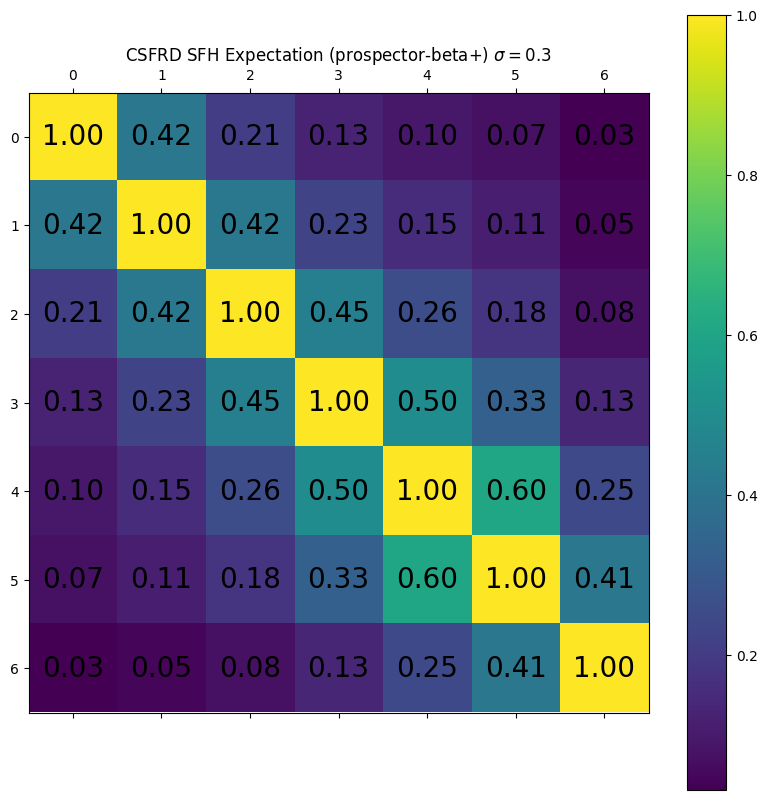

In [7]:
correlations = np.corrcoef(sfrs.T)
plot_corr(correlations, "CSFRD SFH Expectation (prospector-beta+) $\sigma=0.3$")

In [9]:
popcosmos_data = np.load("dust_data/popcosmos_parameters_rmag_lt_25.npy")
nsamples = 500000
popcosmos_logsfrs = popcosmos_data[:nsamples, 2:8]
popcosmos_logm  = popcosmos_data[:nsamples, 0]
popcosmos_zs  = popcosmos_data[:nsamples, -1]

pop_sfrs = get_sfrs_in_bins(popcosmos_logm, popcosmos_logsfrs, popcosmos_zs, sfh.default_agebins())

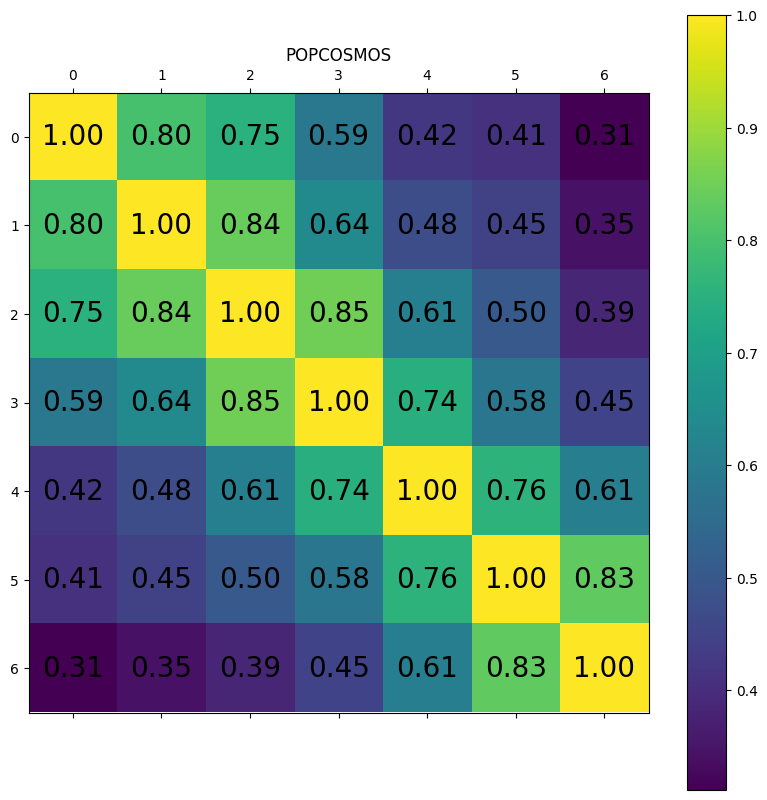

In [10]:
correlations = np.corrcoef(pop_sfrs.T)
plot_corr(correlations, "POPCOSMOS")

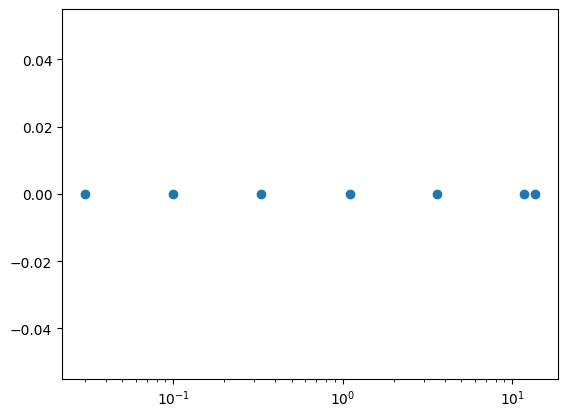

In [11]:
plt.scatter((10**sfh.default_agebins()/1e9)[:, 1], sfh.default_agebins()[:, 1]*0)
plt.xscale("log")

(array([1.77228029e-01, 3.60800467e-01, 4.92031534e-01, 5.87235426e-01,
        6.72733882e-01, 7.51887931e-01, 7.52114517e-01, 7.75868284e-01,
        7.37726305e-01, 7.28511807e-01, 6.74659863e-01, 6.46940841e-01,
        5.93202191e-01, 5.62235435e-01, 5.23375933e-01, 4.81419756e-01,
        4.43844242e-01, 4.17295913e-01, 3.79946985e-01, 3.36178119e-01,
        3.14765741e-01, 2.71412283e-01, 2.44712898e-01, 2.19184206e-01,
        2.06306568e-01, 1.82590565e-01, 1.69977277e-01, 1.52416860e-01,
        1.36857954e-01, 1.24282430e-01, 1.11820199e-01, 9.60724709e-02,
        9.53927129e-02, 8.30815393e-02, 7.39803343e-02, 6.51812440e-02,
        6.21223328e-02, 5.37386502e-02, 5.05664460e-02, 4.24471137e-02,
        3.75755144e-02, 3.29682654e-02, 2.59440989e-02, 2.40936464e-02,
        2.26963660e-02, 1.92220470e-02, 1.55589065e-02, 1.66163079e-02,
        1.53323204e-02, 1.30286959e-02, 1.25755239e-02, 1.03096637e-02,
        9.32779100e-03, 7.55286721e-03, 5.58912174e-03, 4.569484

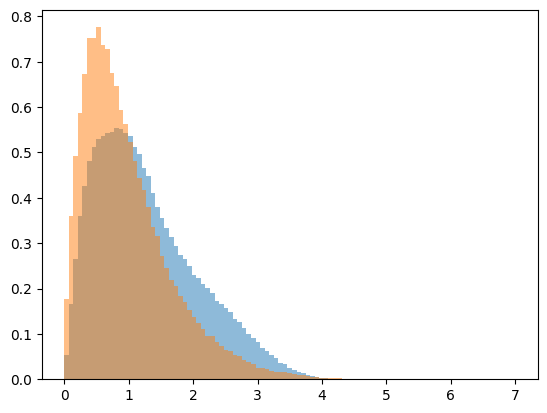

In [17]:
bins = np.linspace(0, 7, 100)
plt.hist(popcosmos_zs, bins=bins, density=True, alpha=0.5)
plt.hist(zs, bins=bins, density=True, alpha=0.5)